# Machine Learning Models

In [ ]:
# importing of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from IPython.display import Image
from IPython.core.display import HTML
import seaborn as sns

%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import lars_path
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import r2_score
import scipy.stats as stats

import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
from sklearn import preprocessing
from sklearn import (
    model_selection,
    feature_selection,
    ensemble,
    linear_model,
    metrics,
    decomposition,
)

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading train-test files

In [ ]:
x_train = pd.read_csv("/content/drive/MyDrive/x_train.csv", header=0).iloc[:, 1:]
x_test = pd.read_csv("/content/drive/MyDrive/x_test.csv", header=0).iloc[:, 1:]
y_train = pd.read_csv("/content/drive/MyDrive/y_train.csv", header=0).iloc[:, 1:]
y_test = pd.read_csv("/content/drive/MyDrive/y_test.csv", header=0).iloc[:, 1:]

In [ ]:
pd.set_option("display.max_columns", None)
x_train.head(3)

,accommodates,bathrooms_text,beds,minimum_nights,maximum_nights,maximum_minimum_nights,minimum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,reviews_per_month,Dist_Acropolis,Dist_Syntagma,neighbourhood_cleansed_ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,neighbourhood_cleansed_ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,neighbourhood_cleansed_ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,neighbourhood_cleansed_ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,neighbourhood_cleansed_ΑΚΡΟΠΟΛΗ,neighbourhood_cleansed_ΑΜΠΕΛΟΚΗΠΟΙ,neighbourhood_cleansed_ΑΝΩ ΚΥΨΕΛΗ,neighbourhood_cleansed_ΑΝΩ ΠΑΤΗΣΙΑ,neighbourhood_cleansed_ΒΟΤΑΝΙΚΟΣ,neighbourhood_cleansed_ΓΚΑΖΙ,neighbourhood_cleansed_ΓΚΥΖΗ,neighbourhood_cleansed_ΓΟΥΒΑ,neighbourhood_cleansed_ΓΟΥΔΙ,neighbourhood_cleansed_ΕΛΛΗΝΟΡΩΣΩΝ,neighbourhood_cleansed_ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,neighbourhood_cleansed_ΖΑΠΠΕΙΟ,neighbourhood_cleansed_ΘΗΣΕΙΟ,neighbourhood_cleansed_ΙΛΙΣΙΑ,neighbourhood_cleansed_ΚΕΡΑΜΕΙΚΟΣ,neighbourhood_cleansed_ΚΟΛΟΚΥΝΘΟΥ,neighbourhood_cleansed_ΚΟΛΩΝΑΚΙ,neighbourhood_cleansed_ΚΟΛΩΝΟΣ,neighbourhood_cleansed_ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,neighbourhood_cleansed_ΚΥΨΕΛΗ,neighbourhood_cleansed_ΛΥΚΑΒΗΤΤΟΣ,neighbourhood_cleansed_ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,neighbourhood_cleansed_ΝΕΑ ΚΥΨΕΛΗ,neighbourhood_cleansed_ΝΕΟΣ ΚΟΣΜΟΣ,neighbourhood_cleansed_ΝΙΡΒΑΝΑ,neighbourhood_cleansed_ΠΑΓΚΡΑΤΙ,neighbourhood_cleansed_ΠΑΤΗΣΙΑ,neighbourhood_cleansed_ΠΕΔΙΟ ΑΡΕΩΣ,neighbourhood_cleansed_ΠΕΝΤΑΓΩΝΟ,neighbourhood_cleansed_ΠΕΤΡΑΛΩΝΑ,neighbourhood_cleansed_ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ,neighbourhood_cleansed_ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,neighbourhood_cleansed_ΠΟΛΥΓΩΝΟ,neighbourhood_cleansed_ΠΡΟΜΠΟΝΑ,neighbourhood_cleansed_ΡΗΓΙΛΛΗΣ,neighbourhood_cleansed_ΡΙΖΟΥΠΟΛΗ,neighbourhood_cleansed_ΣΕΠΟΛΙΑ,neighbourhood_cleansed_ΣΤΑΔΙΟ,neighbourhood_cleansed_ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1.0,host_has_profile_pic_1.0,host_identity_verified_1.0,has_availability_1,instant_bookable_1,has_license_1
0,5,1.0,4.0,2,31,2,31,2.0,31.0,29,59,89,179,0,1.20,1.697690,1.466880,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,6,1.0,2.0,1,29,1,1125,1.0,1125.0,0,0,0,62,75,1.26,2.953900,2.177478,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
2,3,1.0,1.0,1,1125,1,1125,1.0,1125.0,29,59,89,90,36,0.57,2.273573,1.615544,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [ ]:
x_test.head(3)

,accommodates,bathrooms_text,beds,minimum_nights,maximum_nights,maximum_minimum_nights,minimum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,reviews_per_month,Dist_Acropolis,Dist_Syntagma,neighbourhood_cleansed_ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,neighbourhood_cleansed_ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,neighbourhood_cleansed_ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,neighbourhood_cleansed_ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,neighbourhood_cleansed_ΑΚΡΟΠΟΛΗ,neighbourhood_cleansed_ΑΜΠΕΛΟΚΗΠΟΙ,neighbourhood_cleansed_ΑΝΩ ΚΥΨΕΛΗ,neighbourhood_cleansed_ΑΝΩ ΠΑΤΗΣΙΑ,neighbourhood_cleansed_ΒΟΤΑΝΙΚΟΣ,neighbourhood_cleansed_ΓΚΑΖΙ,neighbourhood_cleansed_ΓΚΥΖΗ,neighbourhood_cleansed_ΓΟΥΒΑ,neighbourhood_cleansed_ΓΟΥΔΙ,neighbourhood_cleansed_ΕΛΛΗΝΟΡΩΣΩΝ,neighbourhood_cleansed_ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,neighbourhood_cleansed_ΖΑΠΠΕΙΟ,neighbourhood_cleansed_ΘΗΣΕΙΟ,neighbourhood_cleansed_ΙΛΙΣΙΑ,neighbourhood_cleansed_ΚΕΡΑΜΕΙΚΟΣ,neighbourhood_cleansed_ΚΟΛΟΚΥΝΘΟΥ,neighbourhood_cleansed_ΚΟΛΩΝΑΚΙ,neighbourhood_cleansed_ΚΟΛΩΝΟΣ,neighbourhood_cleansed_ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,neighbourhood_cleansed_ΚΥΨΕΛΗ,neighbourhood_cleansed_ΛΥΚΑΒΗΤΤΟΣ,neighbourhood_cleansed_ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,neighbourhood_cleansed_ΝΕΑ ΚΥΨΕΛΗ,neighbourhood_cleansed_ΝΕΟΣ ΚΟΣΜΟΣ,neighbourhood_cleansed_ΝΙΡΒΑΝΑ,neighbourhood_cleansed_ΠΑΓΚΡΑΤΙ,neighbourhood_cleansed_ΠΑΤΗΣΙΑ,neighbourhood_cleansed_ΠΕΔΙΟ ΑΡΕΩΣ,neighbourhood_cleansed_ΠΕΝΤΑΓΩΝΟ,neighbourhood_cleansed_ΠΕΤΡΑΛΩΝΑ,neighbourhood_cleansed_ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ,neighbourhood_cleansed_ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,neighbourhood_cleansed_ΠΟΛΥΓΩΝΟ,neighbourhood_cleansed_ΠΡΟΜΠΟΝΑ,neighbourhood_cleansed_ΡΗΓΙΛΛΗΣ,neighbourhood_cleansed_ΡΙΖΟΥΠΟΛΗ,neighbourhood_cleansed_ΣΕΠΟΛΙΑ,neighbourhood_cleansed_ΣΤΑΔΙΟ,neighbourhood_cleansed_ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1.0,host_has_profile_pic_1.0,host_identity_verified_1.0,has_availability_1,instant_bookable_1,has_license_1
0,2,1.0,1.0,2,32,2,1125,2.0,1125.0,17,47,77,258,3,0.92,2.398668,1.758095,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
1,4,1.0,3.0,2,1125,2,1125,2.0,1125.0,0,0,0,0,32,0.32,1.731598,2.017828,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
2,2,1.0,1.0,3,1125,3,1125,3.0,1125.0,0,0,0,54,9,0.22,2.844840,2.171475,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1


In [ ]:
y_train.head(3)

,log_price
0,4.094345
1,3.135494
2,4.248495


In [ ]:
y_test.head(3)

,log_price
0,3.401197
1,5.010635
2,3.367296


Checking the shape of our data

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7185, 69), (1797, 69), (7185, 1), (1797, 1))

# Lasso Regression

In [ ]:
from numpy import arange
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

##Hyperparameter tuning

In [ ]:
# define model
model_lasso = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=4, random_state=1)
# define grid
grid_lasso = dict()
grid_lasso["alpha"] = arange(0, 1, 0.01)
# define search
search_lasso = GridSearchCV(
    model_lasso, grid_lasso, scoring="neg_mean_absolute_error", cv=cv, n_jobs=-1
)

In [ ]:
# perform the search
# Fit the grid search model
results_lasso = search_lasso.fit(x_train, y_train)

# summarize
print("MAE: %.3f" % (-results_lasso.best_score_))
print("Config: %s" % results_lasso.best_params_)

##Evaluation

In [ ]:
pred_lasso = results_lasso.predict(x_test)
# Calculate the Mean absolute Error using the mean_absolute_error function.
print("Test Data")
print(
    "Mean Absolute Error : %0.3f"
    % mean_absolute_error(y_test.pow(2.7183), np.power(pred_lasso, 2.7183))
)
print(
    "Mean Absolute Percentage Error : %0.3f"
    % mean_absolute_percentage_error(y_test.pow(2.7183), np.power(pred_lasso, 2.7183))
)

Test Data
Mean Absolute Error : 10.889
Mean Absolute Percentage Error : 0.261


#Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred_linear = lm.predict(x_test)

print("""R2 Score: {}""".format(r2_score(y_test, y_pred_linear) * 100))
print(
    "Mean Absolute Error : %0.3f"
    % mean_absolute_error(y_test.pow(2.7183), np.power(y_pred_linear, 2.7183))
)
print(
    "Mean Absolute Percentage Error : %0.3f"
    % mean_absolute_percentage_error(
        y_test.pow(2.7183), np.power(y_pred_linear, 2.7183)
    )
)

R2 Score: 39.059816716701704
Mean Absolute Error : 10.890
Mean Absolute Percentage Error : 0.261


# Random Forest Model

In [ ]:
# ML libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GroupKFold, GridSearchCV, HalvingGridSearchCV
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

##Hyperparameter tuning

In [ ]:
seed = 42  # random seed for reproducibility
grid = {
    "n_estimators": [200, 300, 400],
    "max_features": ["sqrt", "log2"],
    "max_depth": [5, 7, 9, 10, 12],
    "criterion": [
        "squared_error",
        "absolute_error",
    ],  # 'squared_error', 'absolute_error'
    "random_state": [seed],
}

# Grid Search - CVHalvingGridSearchCV
rfc = HalvingGridSearchCV(
    estimator=RandomForestRegressor(),
    factor=3,
    param_grid=grid,
    cv=4,
    n_jobs=-1,
    verbose=2,
)
# rfc = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv=4,n_jobs=-1, verbose=2)

# Training the model
rfc.fit(x_train, y_train)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 266
max_resources_: 7185
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 60
n_resources: 266
Fitting 4 folds for each of 60 candidates, totalling 240 fits
----------
iter: 1
n_candidates: 20
n_resources: 798
Fitting 4 folds for each of 20 candidates, totalling 80 fits
----------
iter: 2
n_candidates: 7
n_resources: 2394
Fitting 4 folds for each of 7 candidates, totalling 28 fits
----------
iter: 3
n_candidates: 3
n_resources: 7182
Fitting 4 folds for each of 3 candidates, totalling 12 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


HalvingGridSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
                    param_grid={'criterion': ['squared_error',
                                              'absolute_error'],
                                'max_depth': [5, 7, 9, 10, 12],
                                'max_features': ['sqrt', 'log2'],
                                'n_estimators': [200, 300, 400],
                                'random_state': [42]},
                    verbose=2)

In [ ]:
# Print total results
results_df = pd.DataFrame(rfc.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("estimator")

pd.set_option("display.max_columns", None)
results_df[["params", "mean_test_score"]]

,params,mean_test_score
estimator,,
absolute_error_12_sqrt_300_42,"{'criterion': 'absolute_error', 'max_depth': 1...",0.449055
absolute_error_12_sqrt_400_42,"{'criterion': 'absolute_error', 'max_depth': 1...",0.449032
absolute_error_12_sqrt_200_42,"{'criterion': 'absolute_error', 'max_depth': 1...",0.448718
absolute_error_12_sqrt_400_42,"{'criterion': 'absolute_error', 'max_depth': 1...",0.413603
absolute_error_12_sqrt_300_42,"{'criterion': 'absolute_error', 'max_depth': 1...",0.412352
...,...,...
absolute_error_5_log2_200_42,"{'criterion': 'absolute_error', 'max_depth': 5...",0.274150
squared_error_5_log2_400_42,"{'criterion': 'squared_error', 'max_depth': 5,...",0.273884
absolute_error_5_log2_300_42,"{'criterion': 'absolute_error', 'max_depth': 5...",0.273487


In [ ]:
rfc_best_params = rfc.best_params_
rfc_best_params

{'criterion': 'absolute_error',
 'max_depth': 12,
 'max_features': 'sqrt',
 'n_estimators': 300,
 'random_state': 42}

##Fit the model with the best hyperparameters

In [ ]:
rfc_best = RandomForestRegressor(
    n_estimators=rfc_best_params["n_estimators"],
    max_depth=rfc_best_params["max_depth"],
    max_features=rfc_best_params["max_features"],
    random_state=rfc_best_params["random_state"],
    criterion=rfc_best_params["criterion"],
).fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


##Evaluation

In [ ]:
pred_rfc = rfc_best.predict(x_test)
# Calculate the Mean absolute Error using the mean_absolute_error function.
print("Test Data")
print(
    "Mean Absolute Error : %0.3f"
    % mean_absolute_error(y_test.pow(2.7183), np.power(pred_rfc, 2.7183))
)
print(
    "Mean Absolute Percentage Error : %0.3f"
    % mean_absolute_percentage_error(y_test.pow(2.7183), np.power(pred_rfc, 2.7183))
)

Test Data
Mean Absolute Error : 9.692
Mean Absolute Percentage Error : 0.223


##Feature Importances

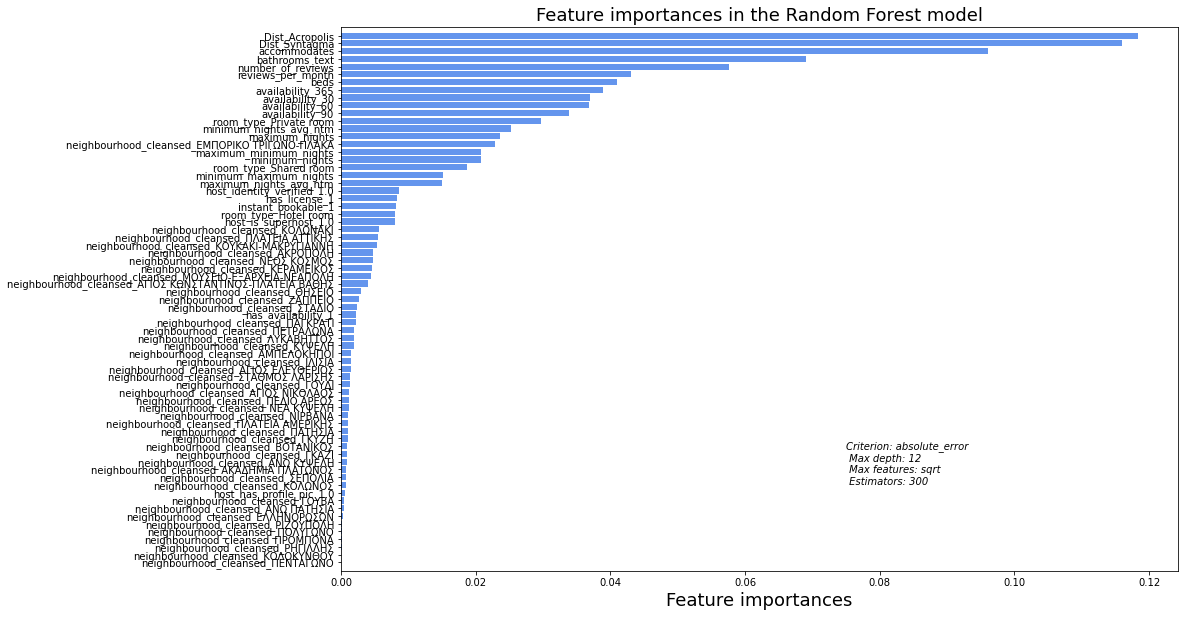

In [ ]:
rf_reg = pd.DataFrame(
    rfc_best.feature_importances_, columns=["weight"], index=x_train.columns
)
rf_reg.sort_values("weight", inplace=True)

plt.figure(figsize=(15, 10))

plt.barh(rf_reg.index, rf_reg.weight, align="center", color="cornflowerblue")
plt.title("Feature importances in the Random Forest model", fontsize=18, color="black")
plt.xlabel("Feature importances", fontsize=18, color="black")
plt.ylabel("", fontsize=20, color="black")

data_string = f'Criterion: {rfc_best_params["criterion"]}\n Max depth: {rfc_best_params["max_depth"]} \n Max features: {rfc_best_params["max_features"]}\n Estimators: {rfc_best_params["n_estimators"]}'
# data_string = f'Criterion: squared_error \n Max depth: 2 \n Estimators: 300 '
plt.text(0.075, 10, data_string, style="italic")

plt.margins(y=0.01)
plt.show()

In [ ]:
import pickle

path = "/content/drive/My Drive/"
with open(path + "rf_model", "wb") as f:
    pickle.dump(rfc_best, f)

# Extra Trees Regression model

In [ ]:
# ML libraries
from sklearn.ensemble import ExtraTreesRegressor

##Hyperparameter tuning

In [ ]:
grid_et = {
    "n_estimators": [100, 200, 300, 400],
    "max_features": ["sqrt", "log2"],
    "max_depth": [5, 7, 10, 12],
    "criterion": ["absolute_error"],  # 'squared_error', 'absolute_error'
    "random_state": [seed],
}

# Grid Searc - CV
# et_model = GridSearchCV(estimator=ExtraTreesRegressor(), param_grid=grid_et, cv= 4,n_jobs=-1, verbose=2)
et_model = HalvingGridSearchCV(
    estimator=ExtraTreesRegressor(),
    factor=3,
    param_grid=grid_et,
    cv=4,
    n_jobs=-1,
    verbose=2,
)

# Training the model
et_model.fit(x_train, y_train)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 266
max_resources_: 7185
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 32
n_resources: 266
Fitting 4 folds for each of 32 candidates, totalling 128 fits
----------
iter: 1
n_candidates: 11
n_resources: 798
Fitting 4 folds for each of 11 candidates, totalling 44 fits
----------
iter: 2
n_candidates: 4
n_resources: 2394
Fitting 4 folds for each of 4 candidates, totalling 16 fits
----------
iter: 3
n_candidates: 2
n_resources: 7182
Fitting 4 folds for each of 2 candidates, totalling 8 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


HalvingGridSearchCV(cv=4, estimator=ExtraTreesRegressor(), n_jobs=-1,
                    param_grid={'criterion': ['absolute_error'],
                                'max_depth': [5, 7, 10, 12],
                                'max_features': ['sqrt', 'log2'],
                                'n_estimators': [100, 200, 300, 400],
                                'random_state': [42]},
                    verbose=2)

In [ ]:
# Print total results
results_df_et = pd.DataFrame(et_model.cv_results_)
results_df_et = results_df_et.sort_values(by=["rank_test_score"])
results_df_et = results_df_et.set_index(
    results_df_et["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("estimator")

pd.set_option("display.max_columns", None)
results_df_et[["params", "mean_test_score"]]

,params,mean_test_score
estimator,,
absolute_error_12_sqrt_200_42,"{'criterion': 'absolute_error', 'max_depth': 1...",0.375810
absolute_error_12_sqrt_400_42,"{'criterion': 'absolute_error', 'max_depth': 1...",0.375516
absolute_error_12_sqrt_200_42,"{'criterion': 'absolute_error', 'max_depth': 1...",0.370994
absolute_error_12_sqrt_400_42,"{'criterion': 'absolute_error', 'max_depth': 1...",0.370917
absolute_error_12_sqrt_300_42,"{'criterion': 'absolute_error', 'max_depth': 1...",0.369218
absolute_error_12_log2_100_42,"{'criterion': 'absolute_error', 'max_depth': 1...",0.348479
absolute_error_12_log2_100_42,"{'criterion': 'absolute_error', 'max_depth': 1...",0.289301
absolute_error_12_sqrt_400_42,"{'criterion': 'absolute_error', 'max_depth': 1...",0.286265
absolute_error_12_sqrt_300_42,"{'criterion': 'absolute_error', 'max_depth': 1...",0.285627


In [ ]:
et_best_params = et_model.best_params_
et_best_params

{'criterion': 'absolute_error',
 'max_depth': 12,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'random_state': 42}

##Fit the model with the best hyperparameters

In [ ]:
et_best = ExtraTreesRegressor(
    n_estimators=et_best_params["n_estimators"],
    max_depth=et_best_params["max_depth"],
    max_features=et_best_params["max_features"],
    random_state=et_best_params["random_state"],
    criterion=et_best_params["criterion"],
).fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


##Evaluation

In [ ]:
pred_et = et_best.predict(x_test)
# Calculate the Mean absolute Error using the mean_absolute_error function.
print("Test Data")
print(
    "Mean Absolute Error : %0.3f"
    % mean_absolute_error(y_test.pow(2.7183), np.power(pred_et, 2.7183))
)
print(
    "Mean Absolute Percentage Error : %0.3f"
    % mean_absolute_percentage_error(y_test.pow(2.7183), np.power(pred_et, 2.7183))
)

Test Data
Mean Absolute Error : 10.519
Mean Absolute Percentage Error : 0.238


##Feature Importances

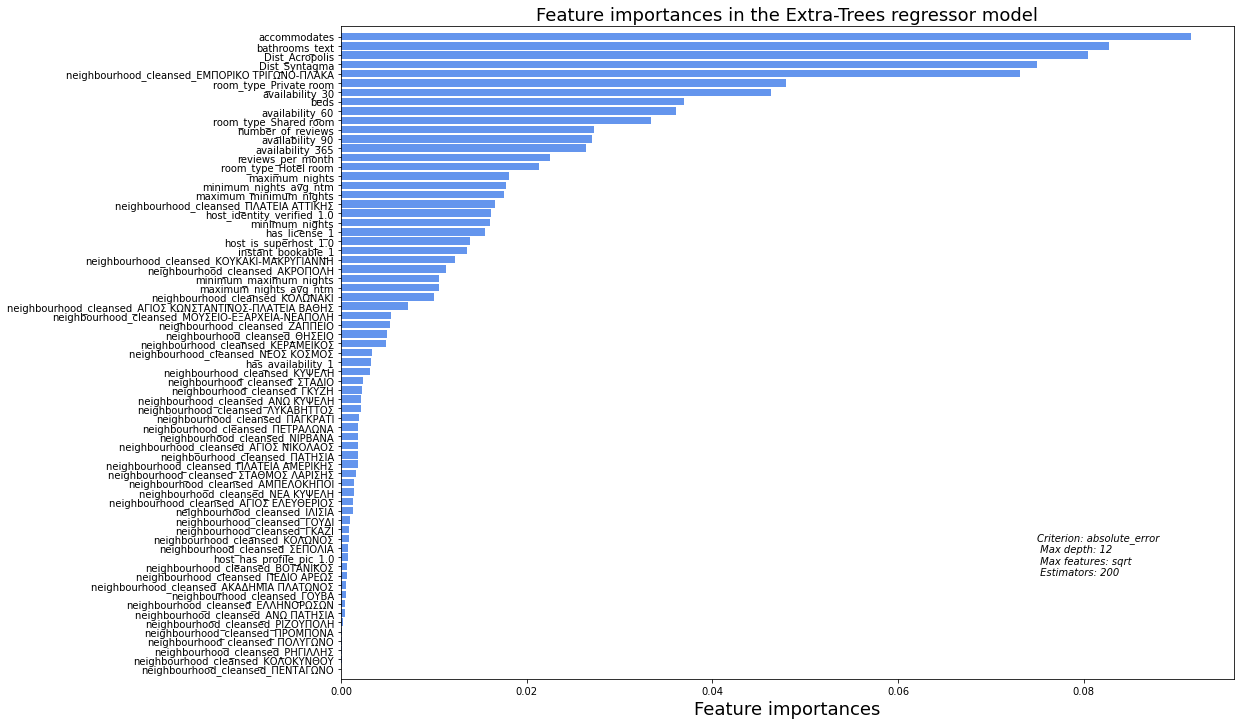

In [ ]:
et_reg = pd.DataFrame(
    et_best.feature_importances_, columns=["weight"], index=x_train.columns
)
et_reg.sort_values("weight", inplace=True)

plt.figure(figsize=(16, 12))

plt.barh(et_reg.index, et_reg.weight, align="center", color="cornflowerblue")
plt.title(
    "Feature importances in the Extra-Trees regressor model", fontsize=18, color="black"
)
plt.xlabel("Feature importances", fontsize=18, color="black")
plt.ylabel("", fontsize=18, color="black")

data_string = f'Criterion: {et_best_params["criterion"]}\n Max depth: {et_best_params["max_depth"]} \n Max features: {et_best_params["max_features"]}\n Estimators: {et_best_params["n_estimators"]}'
# data_string = f'Criterion: squared_error \n Max depth: 2 \n Estimators: 300 '
plt.text(0.075, 10, data_string, style="italic")

plt.margins(y=0.01)
plt.show()

In [ ]:
path = "/content/drive/My Drive/"
with open(path + "et_model", "wb") as f:
    pickle.dump(et_best, f)

# LightGBM Model

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import ParameterSampler
from sklearn.model_selection import cross_val_score

##Hyperparameter tuning

In [ ]:
model_lgb = LGBMRegressor(boosting_type="gbdt", objective="regression")

parameters_lgb = {
    "num_leaves": [20, 40],
    "min_child_samples": [5, 10, 15],
    "max_depth": [5, 10, 20],
    "learning_rate": [0.05, 0.1, 0.2],
    "reg_alpha": [0, 0.01, 0.03],
    "random_state": [seed],
}

gridSearchCV = GridSearchCV(
    estimator=model_lgb,
    param_grid=parameters_lgb,
    scoring="neg_mean_absolute_error",
    verbose=2,
    cv=4,
)

In [ ]:
lgb_fitted = gridSearchCV.fit(x_train, y_train)
gridSearchCV.best_params_

Fitting 4 folds for each of 162 candidates, totalling 648 fits
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=5, num_leaves=20, random_state=42, reg_alpha=0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=5, num_leaves=20, random_state=42, reg_alpha=0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=5, num_leaves=20, random_state=42, reg_alpha=0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=5, num_leaves=20, random_state=42, reg_alpha=0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=5, num_leaves=20, random_state=42, reg_alpha=0.01; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=5, num_leaves=20, random_state=42, reg_alpha=0.01; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=5, num_leaves=20, random_state=42, reg_alpha=0.01; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=

{'learning_rate': 0.1,
 'max_depth': 20,
 'min_child_samples': 10,
 'num_leaves': 40,
 'random_state': 42,
 'reg_alpha': 0}

In [ ]:
gridSearchCV.best_score_

-0.31575386321941956

In [ ]:
b = gridSearchCV.best_params_
b

{'learning_rate': 0.1,
 'max_depth': 20,
 'min_child_samples': 10,
 'num_leaves': 40,
 'random_state': 42,
 'reg_alpha': 0}

##Fit the model with the best hyperparameters

In [ ]:
LGBM_best = LGBMRegressor(
    boosting_type="gbdt",
    objective="regression",
    learning_rate=b["learning_rate"],
    max_depth=b["max_depth"],
    min_child_samples=b["min_child_samples"],
    num_leaves=b["num_leaves"],
    reg_alpha=b["reg_alpha"],
    random_state=b["random_state"],
).fit(x_train, y_train)

##Evaluation



In [ ]:
# Use the model to predict values
y_pred_lgb = LGBM_best.predict(x_test)

# Calculate the Mean absolute Error using the mean_absolute_error function.
print("Test Data")
print(
    "Mean Absolute Error : %0.3f"
    % mean_absolute_error(y_test.pow(2.7183), np.power(y_pred_lgb, 2.7183))
)
print(
    "Mean Absolute Percentage Error : %0.3f"
    % mean_absolute_percentage_error(y_test.pow(2.7183), np.power(y_pred_lgb, 2.7183))
)

Test Data
Mean Absolute Error : 9.447
Mean Absolute Percentage Error : 0.214


In [ ]:
print("Best parameters for LightGBM model:", gridSearchCV.best_params_)
print(
    "Mean Absolute Error on test set for LightGBM model is: ",
    (mean_absolute_error(y_test.pow(2.7183), np.power(y_pred_lgb, 2.7183))),
)

Best parameters for LightGBM model: {'learning_rate': 0.1, 'max_depth': 20, 'min_child_samples': 10, 'num_leaves': 40, 'random_state': 42, 'reg_alpha': 0}
Mean Absolute Error on test set for LightGBM model is:  9.447353114616352


##Feature Importances

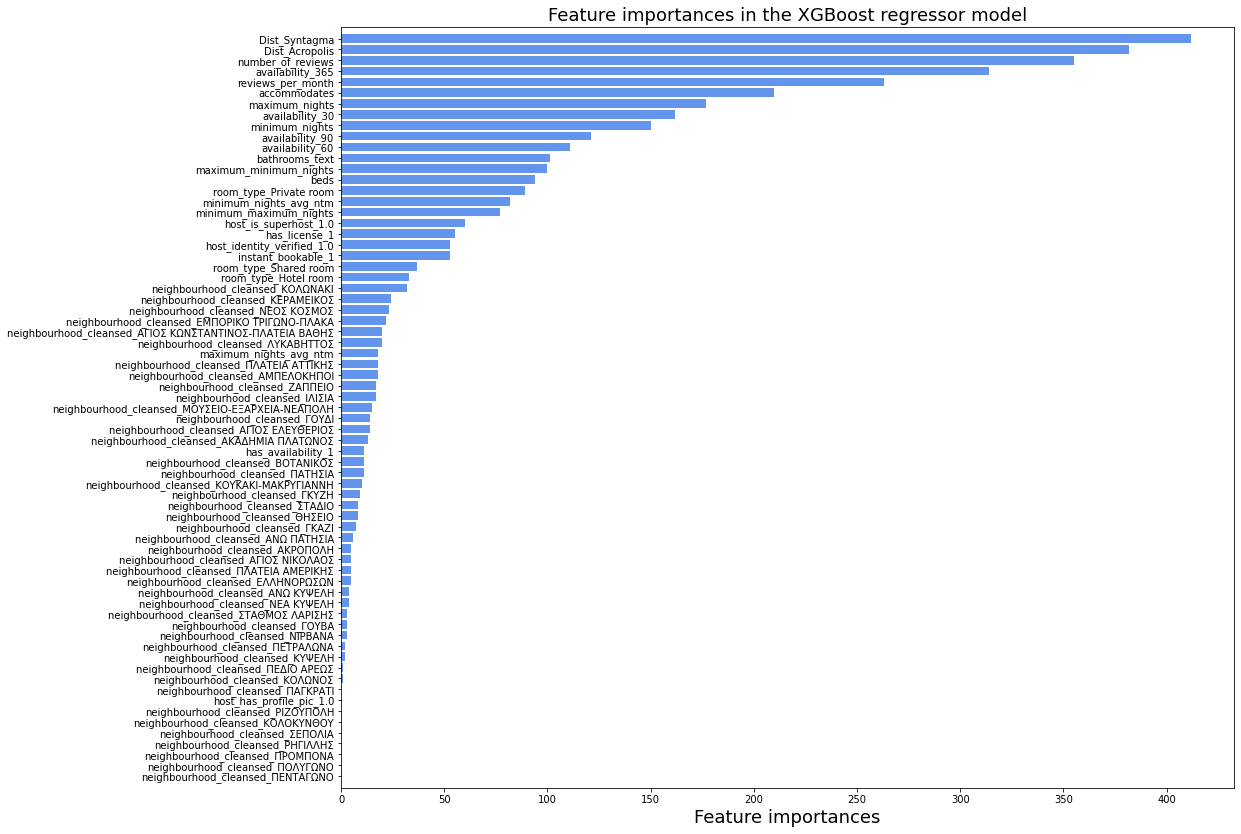

In [ ]:
rf_reg = pd.DataFrame(
    LGBM_best.feature_importances_, columns=["weight"], index=x_train.columns
)
rf_reg.sort_values("weight", inplace=True)
plt.figure(figsize=(16, 14))
plt.barh(rf_reg.index, rf_reg.weight, align="center", color="cornflowerblue")
plt.title(
    "Feature importances in the XGBoost regressor model", fontsize=18, color="black"
)
plt.xlabel("Feature importances", fontsize=18, color="black")
plt.ylabel("", fontsize=18, color="black")
plt.margins(y=0.01)
plt.show()

In [ ]:
path = "/content/drive/My Drive/"
with open(path + "LGBM_model", "wb") as f:
    pickle.dump(LGBM_best, f)

# XGBoost model

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

seed = 42

In [ ]:
params = {
    "max_depth": [3, 6, 10],
    "subsample": [0.7],
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [100, 500, 1000],
    "colsample_bytree": [0.3, 0.7],
    "random_state": [seed],
}

In [ ]:
xgbr = xgb.XGBRegressor()
clf = GridSearchCV(
    estimator=xgbr,
    param_grid=params,
    cv=4,
    scoring="neg_mean_absolute_error",
    verbose=2,
)

##Hyperparameters tuning


In [ ]:
clf_xgb = clf.fit(x_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits
[16:34:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, random_state=42, subsample=0.7; total time=   0.5s
[16:34:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, random_state=42, subsample=0.7; total time=   0.4s
[16:34:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, random_state=42, subsample=0.7; total time=   0.4s
[16:34:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.3, 

In [ ]:
c = clf.best_params_
c

{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 10,
 'n_estimators': 1000,
 'random_state': 42,
 'subsample': 0.7}

##Fit the model with the best hyperparameters

In [ ]:
clf_xgb = XGBRegressor(
    max_depth=c["max_depth"],
    subsample=c["subsample"],
    learning_rate=c["learning_rate"],
    n_estimators=c["n_estimators"],
    colsample_bytree=c["colsample_bytree"],
    random_state=c["random_state"],
).fit(x_train, y_train)

[16:53:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


##Evaluation

In [ ]:
# Use the model to predict values
# Predict the model
y_pred_xgb = clf_xgb.predict(x_test)

# Calculate the Mean absolute Error using the mean_absolute_error function.
print("Test Data")
print(
    "Mean Absolute Error : %0.3f"
    % mean_absolute_error(y_test.pow(2.7183), np.power(y_pred_xgb, 2.7183))
)
print(
    "Mean Absolute Percentage Error : %0.3f"
    % mean_absolute_percentage_error(y_test.pow(2.7183), np.power(y_pred_xgb, 2.7183))
)

Test Data
Mean Absolute Error : 9.136
Mean Absolute Percentage Error : 0.209


##Feature Importances

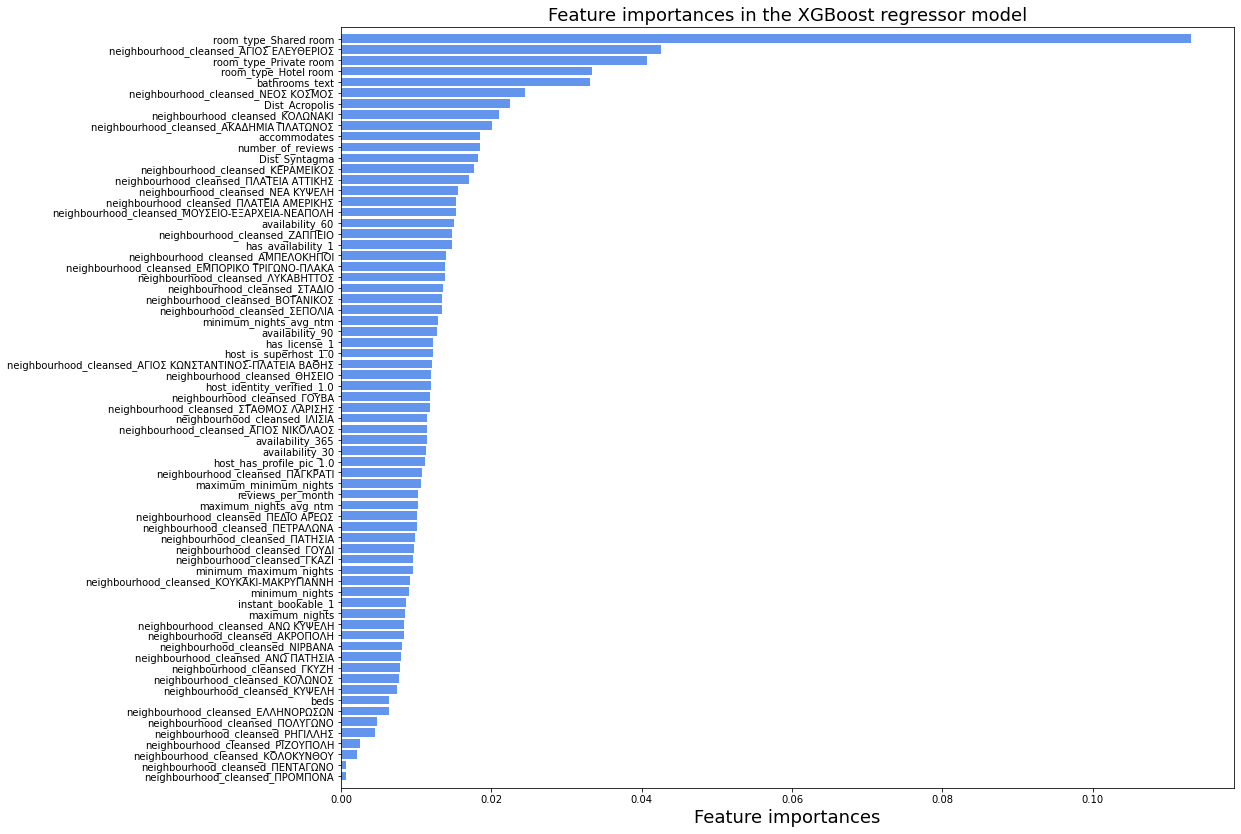

In [ ]:
rf_reg = pd.DataFrame(
    clf_xgb.feature_importances_, columns=["weight"], index=x_train.columns
)
rf_reg.sort_values("weight", inplace=True)
plt.figure(figsize=(16, 14))
plt.barh(rf_reg.index, rf_reg.weight, align="center", color="cornflowerblue")
plt.title(
    "Feature importances in the XGBoost regressor model", fontsize=18, color="black"
)
plt.xlabel("Feature importances", fontsize=18, color="black")
plt.ylabel("", fontsize=18, color="black")
plt.margins(y=0.01)
plt.show()

In [ ]:
path = "/content/drive/My Drive/"
clf_xgb.save_model(path + "xgb_model")

# Conclusion

This notebook contains all the machine learning models implemented in an effort to predict the price of an airbnb listing.Various regression models were fit such as Random Forest, Extra Trees, LightGBM and XGBoost. The metric that was used to evaluate the performance of this models was Mean Absolute Error.
MAE is the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

For all the models GridSearch or HalvingGridSearch was used to tune the hyperparameters with combination with a  4-cross validation.

# Final model selection

Overall, results shoed that this model that performed slightly better than all other machine learning models implemented was the XGboost model.

Therefore this model will be used for our web app.